# Data Wrangling Crime

- Author: Bharath Kumar Devakumar
- Work For: AlphAtom
- Date: 18-08-2017
- Description: Data preprocessing and cleaning
- Data: Accident statistics from 2012 - 2017
- Source: https://www.data.vic.gov.au/data/dataset/crash-stats-data-extract

In [1]:
#defining packages used in this notebook
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import numpy as np
from pandas.tseries.offsets import *
# import pyodbc
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from scipy.stats import linregress,spearmanr
import re
import xlrd
import seaborn as sns



In [2]:
os.chdir('/Users/Bharath/Documents/MDS/Semester 4 /IE/Project/Data')
crimetempdf = pd.read_excel('crimedata.xlsx')
# nmefunc = lambda x: x.title().strip()
# postdf['suburb'] = postdf.suburb.dropna().apply(nmefunc)


In [3]:
crimetempdf.tail()

,Jan - Dec reference period,Postcode,Suburb/Town Name,CSA Offence Division,CSA Offence Subdivision,CSA Offence Group,Offence Count
96464,2016,3996,INVERLOCH,F Other offences,F20 Transport regulation offences,F20 Transport regulation offences,1
96465,2016,3996,INVERLOCH,F Other offences,F30 Other government regulatory offences,F30 Other government regulatory offences,2
96466,2016,3996,INVERLOCH,F Other offences,F90 Miscellaneous offences,F90 Miscellaneous offences,1
96467,2016,3996,POUND CREEK,B Property and deception offences,B30 Burglary/Break and enter,B32 Non-aggravated burglary,1
96468,2016,3996,POUND CREEK,B Property and deception offences,B40 Theft,B49 Other theft,1


In [118]:
crimedf1 = crimetempdf[(crimetempdf['CSA Offence Subdivision']=='A Crimes against the person')]
crimedf2 = crimetempdf[(crimetempdf['CSA Offence Subdivision']=='B30 Burglary/Break and enter')]
crimedf3 = crimetempdf[(crimetempdf['CSA Offence Subdivision']=='B40 Theft')]
crimedf4 = crimetempdf[(crimetempdf['CSA Offence Subdivision']=='A Crimes against the person') | (crimetempdf['CSA Offence Subdivision']=='B30 Burglary/Break and enter') | (crimetempdf['CSA Offence Subdivision']=='B40 Theft')]

In [119]:
crimedf1.columns = ['year','postcode','suburb','crime_offence_division','crime_offence_sub_division','crime_offence_group','crime_offence_count']
crimedf2.columns = ['year','postcode','suburb','burglary_offence_division','burglary_offence_sub_division','burglary_offence_group','burglary_offence_count']
crimedf3.columns = ['year','postcode','suburb','theft_offence_division','theft_offence_sub_division','theft_offence_group','theft_offence_count']
crimedf4.columns = ['year','postcode','suburb','offence_division','offence_sub_division','offence_group','offence_count']

In [120]:
nmefunc = lambda x: x.title().strip()
crimedf1['suburb'] = crimedf1.suburb.dropna().apply(nmefunc)
crimedf2['suburb'] = crimedf2.suburb.dropna().apply(nmefunc)
crimedf3['suburb'] = crimedf3.suburb.dropna().apply(nmefunc)
crimedf4['suburb'] = crimedf4.suburb.dropna().apply(nmefunc)

/Users/Bharath/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Bharath/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Bharath/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [121]:
crimedf1 = crimedf1[crimedf1['year']==2016]
crimedf2 = crimedf2[crimedf2['year']==2016]
crimedf3 = crimedf3[crimedf3['year']==2016]
crimedf4 = crimedf4[crimedf4['year']==2016]

In [122]:
print crimedf1.count()
print crimedf2.count()
print crimedf3.count()
print crimedf4.count()

year                          1614
postcode                      1614
suburb                        1614
crime_offence_division        1614
crime_offence_sub_division    1614
crime_offence_group           1614
crime_offence_count           1614
dtype: int64
year                             2100
postcode                         2100
suburb                           2100
burglary_offence_division        2100
burglary_offence_sub_division    2100
burglary_offence_group           2100
burglary_offence_count           2100
dtype: int64
year                          5709
postcode                      5709
suburb                        5709
theft_offence_division        5709
theft_offence_sub_division    5709
theft_offence_group           5709
theft_offence_count           5709
dtype: int64
year                    9423
postcode                9423
suburb                  9423
offence_division        9423
offence_sub_division    9423
offence_group           9423
offence_count           9423
dt

In [123]:
crimedf4 = crimedf4[['year','postcode','suburb', 'offence_count']]

In [124]:
crimedf1 = pd.DataFrame(crimedf1.groupby(by=['suburb','year','postcode'])['crime_offence_count'].sum())
crimedf2 = pd.DataFrame(crimedf2.groupby(by=['suburb','year','postcode'])['burglary_offence_count'].sum())
crimedf3 = pd.DataFrame(crimedf3.groupby(by=['suburb','year','postcode'])['theft_offence_count'].sum())
crimedf4 = pd.DataFrame(crimedf4.groupby(by=['suburb','year','postcode'])['offence_count'].sum())

In [136]:
crimedf = pd.merge(crimedf1, crimedf2, left_index=True, right_index=True, how = 'inner') 
crimedf = pd.merge(crimedf, crimedf3,left_index=True, right_index=True, how = 'inner') 
crimedf = pd.merge(crimedf, crimedf4, left_index=True, right_index=True, how = 'inner') 


In [137]:
crimedf

,,,crime_offence_count,burglary_offence_count,theft_offence_count,offence_count
suburb,year,postcode,,,,
Abbotsford,2016,3067,103,110,619,832
Aberfeldie,2016,3040,12,13,64,89
Aireys Inlet,2016,3231,8,4,3,15
Airport West,2016,3042,69,88,506,663
Albanvale,2016,3021,51,40,79,170
Albert Park,2016,3206,59,59,407,525
Albion,2016,3020,78,57,167,302
Alexandra,2016,3714,47,11,25,83
Alfredton,2016,3350,66,99,244,409


In [143]:
crimedf.reset_index(level=['suburb', 'year','postcode'],inplace=True)

In [144]:
crimedf.count()

suburb                    1150
year                      1150
postcode                  1150
crime_offence_count       1150
burglary_offence_count    1150
theft_offence_count       1150
offence_count             1150
dtype: int64

### Read Suburb Data

In [139]:
os.chdir('/Users/Bharath/Documents/MDS/Semester 4 /IE/Project/Data/')
subdf = pd.read_csv('Suburb_Data_Full_v10.csv',)
subdf.head()

,Unnamed: 0,index,community_name,region,map_reference,grid_reference,location,population_density,travel_time_gpo,distance_to_gpo,...,emergency department presentations,emergency department presentations_percent,postcode,suburb,state,dc,type,lat,lon,suburb_id
0,0,0,Abbotsford,Northern and Western Metropolitan,4.0,C3,3km ENE of Melbourne,3082.440714,6.114670,4.264157,...,885.444791,63.414814,3067,Abbotsford,VIC,FITZROY DC,Delivery Area,-37.801781,144.998752,0
1,1,1,Aberfeldie,Northern and Western Metropolitan,4.0,B2,8km NW of Melbourne,2426.665450,13.410363,9.881527,...,487.056490,56.290032,3040,Aberfeldie,VIC,MOONEE PONDS DC,Delivery Area,-37.756690,144.896259,1
2,2,2,Airport West,Northern and Western Metropolitan,4.0,A1,12km NW of Melbourne,1972.445069,14.529965,15.217034,...,935.248290,56.454248,3042,Airport West,VIC,NIDDRIE DC,Delivery Area,-37.711698,144.887037,2
3,3,3,Albanvale,Northern and Western Metropolitan,3.0,D1,19km WNW of Melbourne,2879.831482,24.349505,26.176087,...,744.175853,60.273026,3021,Albanvale,VIC,ST ALBANS DC,Delivery Area,-37.745934,144.770027,3
4,4,4,Albert Park,Southern Metropolitan,1.0,B1,3km S of Melbourne,1850.280150,6.382196,4.248504,...,757.322366,56.815347,3206,Albert Park,VIC,SOUTH MELBOURNE DC,Delivery Area,-37.840705,144.955710,4


### Extract population density and area column

In [140]:
subpopdf = subdf[['suburb_id','population_density','area','suburb']]

In [141]:
subpopdf.count()

suburb_id             328
population_density    328
area                  328
suburb                328
dtype: int64

### Checking for unmatched values between two dataframe before merging

In [145]:
subpopdf[(~subpopdf.suburb.isin(crimedf.suburb))]

,suburb_id,population_density,area,suburb
21,21,918.994115,5.965218,Ballarat East
22,22,1525.108606,2.651614,Ballarat North
111,111,1361.464283,2.918182,East Geelong
136,136,68.349004,3.921052,Golden Gully
160,160,1232.525349,0.921685,Ironbark
161,161,1889.978987,2.129124,Ivanhoe East
218,218,1070.830871,2.020861,Mount Pleasant
257,257,878.526586,5.424992,Rosebud West
271,271,29.249558,9.299286,Sherbrooke
320,320,181.121642,1.954488,West Bendigo


### Merge the dataframes using right join 
- Right join would keep the unmatched suburb
-  We can fix the missing values manually

In [146]:
crimemergedf = pd.merge(crimedf, subpopdf, left_on = 'suburb', right_on = 'suburb', how = 'right') 

In [147]:
# Count of values under each column
crimemergedf.count()

suburb                    328
year                      318
postcode                  318
crime_offence_count       318
burglary_offence_count    318
theft_offence_count       318
offence_count             318
suburb_id                 328
population_density        328
area                      328
dtype: int64

### Check for unmatched using substring matching

In [148]:
crimedf[crimedf['suburb'].str.contains('Ballarat')]

,suburb,year,postcode,crime_offence_count,burglary_offence_count,theft_offence_count,offence_count
49,Ballarat,2016,3350,908,441,1791,3140
50,Ballarat Central,2016,3350,30,9,119,158


In [149]:
crimedf[crimedf['suburb'].str.contains('Geelong East')]

,suburb,year,postcode,crime_offence_count,burglary_offence_count,theft_offence_count,offence_count
394,Geelong East,2016,3219,29,98,178,305


In [150]:
crimedf[crimedf['suburb'].str.contains('Ivan')]

,suburb,year,postcode,crime_offence_count,burglary_offence_count,theft_offence_count,offence_count
500,Ivanhoe,2016,3079,93,135,485,713


In [151]:
crimedf[crimedf['suburb'].str.contains('Gold')]

,suburb,year,postcode,crime_offence_count,burglary_offence_count,theft_offence_count,offence_count
418,Golden Beach,2016,3851,11,20,15,46
419,Golden Point,2016,3350,9,12,34,55
420,Golden Square,2016,3555,91,64,230,385


In [163]:
crimedf[crimedf['suburb'].str.contains('Rose')]

,suburb,year,postcode,crime_offence_count,burglary_offence_count,theft_offence_count,offence_count
878,Rosebud,2016,3939,232,165,455,852
879,Rosedale,2016,3847,50,26,68,144


In [164]:
crimedf[crimedf['suburb'].str.contains('Bend')]

,suburb,year,postcode,crime_offence_count,burglary_offence_count,theft_offence_count,offence_count
91,Bendigo,2016,3550,610,144,848,1602
92,Bendigo East,2016,3550,9,20,53,82
93,Bendigo North,2016,3550,23,26,35,84
120,Boundary Bend,2016,3599,1,4,3,8
330,East Bendigo,2016,3550,11,7,37,55
776,North Bendigo,2016,3550,25,12,21,58


In [159]:
print round(crimedf["crime_offence_count"].mean()), round(crimedf["burglary_offence_count"].mean()) ,round(crimedf["theft_offence_count"].mean()) ,round(crimedf["offence_count"].mean())

68.0 47.0 165.0 280.0


In [165]:
crimemergedf.loc[crimemergedf['suburb'] == 'Ballarat East', ['year','postcode','crime_offence_count','burglary_offence_count','theft_offence_count','offence_count']] =[ '2016','3350',454,221,845,1570]
crimemergedf.loc[crimemergedf['suburb'] == 'Ballarat North', ['year','postcode','crime_offence_count','burglary_offence_count','theft_offence_count','offence_count']] =[ '2016','3350',454,221,845,1570]
crimemergedf.loc[crimemergedf['suburb'] == 'East Geelong', ['year','postcode','crime_offence_count','burglary_offence_count','theft_offence_count','offence_count']] =[ '2016','3219',29,98,178,305]
crimemergedf.loc[crimemergedf['suburb'] == 'Ivanhoe East', ['year','postcode','crime_offence_count','burglary_offence_count','theft_offence_count','offence_count']] =[ '2016','3079',93,135,485,713]
crimemergedf.loc[crimemergedf['suburb'] == 'Golden Gully', ['year','postcode','crime_offence_count','burglary_offence_count','theft_offence_count','offence_count']] =[ '2016','3851',68,47,165,280]
crimemergedf.loc[crimemergedf['suburb'] == 'Sherbrooke', ['year','postcode','crime_offence_count','burglary_offence_count','theft_offence_count','offence_count']] =[ '2016','3789',68,47,165,280]
crimemergedf.loc[crimemergedf['suburb'] == 'Ironbark', ['year','postcode','crime_offence_count','burglary_offence_count','theft_offence_count','offence_count']] =[ '2016','3066',68,47,165,280]
crimemergedf.loc[crimemergedf['suburb'] == 'Mount Pleasant', ['year','postcode','crime_offence_count','burglary_offence_count','theft_offence_count','offence_count']]=[ '2016','3350',68,47,165,280]
crimemergedf.loc[crimemergedf['suburb'] == 'Rosebud West', ['year','postcode','crime_offence_count','burglary_offence_count','theft_offence_count','offence_count']] =[ '2016','3939',232,165,455,852]
crimemergedf.loc[crimemergedf['suburb'] == 'West Bendigo', ['year','postcode','crime_offence_count','burglary_offence_count','theft_offence_count','offence_count']] =[ '2016','3939',9,20,53,82]

In [166]:
crimemergedf

,suburb,year,postcode,crime_offence_count,burglary_offence_count,theft_offence_count,offence_count,suburb_id,population_density,area
0,Abbotsford,2016,3067,103.0,110.0,619.0,832.0,0,3082.440714,1.740504
1,Aberfeldie,2016,3040,12.0,13.0,64.0,89.0,1,2426.665450,1.551512
2,Airport West,2016,3042,69.0,88.0,506.0,663.0,2,1972.445069,3.719242
3,Albanvale,2016,3021,51.0,40.0,79.0,170.0,3,2879.831482,1.903584
4,Albert Park,2016,3206,59.0,59.0,407.0,525.0,4,1850.280150,3.455693
5,Alfredton,2016,3350,66.0,99.0,244.0,409.0,5,950.801990,8.007977
6,Altona North,2016,3025,152.0,85.0,481.0,718.0,6,857.216967,14.029120
7,Ardeer,2016,3022,76.0,27.0,194.0,297.0,7,1450.693717,2.023859
8,Armadale,2016,3143,62.0,79.0,365.0,506.0,8,4269.894587,2.182724
9,Ascot,2016,3551,8.0,4.0,10.0,22.0,9,505.270765,2.768812


In [167]:
# Count of values under each column
crimemergedf.count()

suburb                    328
year                      328
postcode                  328
crime_offence_count       328
burglary_offence_count    328
theft_offence_count       328
offence_count             328
suburb_id                 328
population_density        328
area                      328
dtype: int64

In [171]:
crimemergedf.offence_count.describe()

count      328.000000
mean       596.216463
std        862.960362
min          7.000000
25%        135.250000
50%        372.000000
75%        785.500000
max      11489.000000
Name: offence_count, dtype: float64

### Correlation Analysis

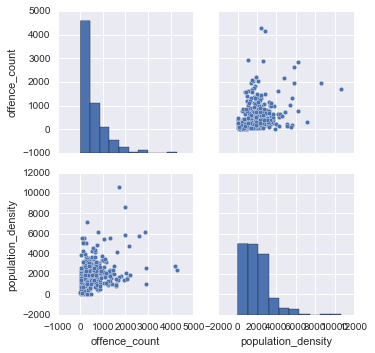

In [179]:
sns.set()
%matplotlib inline
# Pair plot function helps to visualise the correlation between numreic attributes
plotdf = crimemergedf[['offence_count','population_density']][crimemergedf['offence_count']<8000]
sns.pairplot(plotdf.dropna())

### Observation
- We could see that offence count is correlated to population density 

In [180]:
crimemergedf.offence_count.describe()

count      328.000000
mean       596.216463
std        862.960362
min          7.000000
25%        135.250000
50%        372.000000
75%        785.500000
max      11489.000000
Name: offence_count, dtype: float64

In [182]:
def Generic_label_func(x,y):
    if x<y[4]:
        return 'Low'
    elif x<y[5]:
        return 'Moderate'
    elif x<y[6]:
        return 'High'
    else:
        return 'Very High'

In [183]:
crimemergedf[crimemergedf['offence_count']<10]

,suburb,year,postcode,crime_offence_count,burglary_offence_count,theft_offence_count,offence_count,suburb_id,population_density,area
76,Clematis,2016,3782,2.0,2.0,4.0,8.0,78,147.253717,2.499088
254,Sailors Gully,2016,3556,4.0,1.0,2.0,7.0,262,161.065903,4.873781
289,The Patch,2016,3792,3.0,1.0,5.0,9.0,298,273.898737,3.975922


In [186]:
crimemergedf['crime_rate'] = crimemergedf.apply(lambda row: Generic_label_func(row['offence_count'], crimemergedf.offence_count.describe()), axis=1)
crimemergedf['crime_against_person_rate'] = crimemergedf.apply(lambda row: Generic_label_func(row['crime_offence_count'], crimemergedf.crime_offence_count.describe()), axis=1)
crimemergedf['burglary_rate'] = crimemergedf.apply(lambda row: Generic_label_func(row['burglary_offence_count'], crimemergedf.burglary_offence_count.describe()), axis=1)
crimemergedf['theft_rate'] = crimemergedf.apply(lambda row: Generic_label_func(row['theft_offence_count'], crimemergedf.theft_offence_count.describe()), axis=1)

In [187]:
crimemergedf

,suburb,year,postcode,crime_offence_count,burglary_offence_count,theft_offence_count,offence_count,suburb_id,population_density,area,crime_rate,crime_against_person_rate,burglary_rate,theft_rate
0,Abbotsford,2016,3067,103.0,110.0,619.0,832.0,0,3082.440714,1.740504,Very High,High,High,Very High
1,Aberfeldie,2016,3040,12.0,13.0,64.0,89.0,1,2426.665450,1.551512,Low,Low,Low,Low
2,Airport West,2016,3042,69.0,88.0,506.0,663.0,2,1972.445069,3.719242,High,Moderate,High,Very High
3,Albanvale,2016,3021,51.0,40.0,79.0,170.0,3,2879.831482,1.903584,Moderate,Moderate,Moderate,Moderate
4,Albert Park,2016,3206,59.0,59.0,407.0,525.0,4,1850.280150,3.455693,High,Moderate,Moderate,High
5,Alfredton,2016,3350,66.0,99.0,244.0,409.0,5,950.801990,8.007977,High,Moderate,High,High
6,Altona North,2016,3025,152.0,85.0,481.0,718.0,6,857.216967,14.029120,High,High,High,Very High
7,Ardeer,2016,3022,76.0,27.0,194.0,297.0,7,1450.693717,2.023859,Moderate,High,Moderate,Moderate
8,Armadale,2016,3143,62.0,79.0,365.0,506.0,8,4269.894587,2.182724,High,Moderate,High,High
9,Ascot,2016,3551,8.0,4.0,10.0,22.0,9,505.270765,2.768812,Low,Low,Low,Low


In [188]:
crimemergedf.to_csv('crimeratingdata.csv', sep=',')